In [ ]:
 %tensorflow_version 2.x

<h1 align="center"> PCA + Logistic Regression (MNIST) </h1>

https://github.com/mGalarnyk/Python_Tutorials/tree/master/Sklearn/PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.youtube.com/watch?v=FgakZw6K1QQ

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Parameters | Number
--- | ---
Classes | 10
Samples per class | ~7000 samples per class
Samples total | 70000
Dimensionality | 784
Features | integers values from 0 to 255

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## Download and Load the Data

In [ ]:
# You can add the parameter data_home to wherever to where you want to download your data
mnist = fetch_openml('mnist_784')

In [ ]:
# These are the images
mnist.data.shape

(70000, 784)

In [ ]:
# These are the labels
mnist.target.shape

(70000,)

## Splitting Data into Training and Test Sets

In [ ]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
x_t=train_img

In [ ]:
print(train_img.shape)

(60000, 784)


In [ ]:
print(train_lbl.shape)

(60000,)


In [ ]:
print(test_img.shape)

(10000, 784)


In [ ]:
print(test_lbl.shape)

(10000,)


In [ ]:
train_lbl[3]

'1'

In [ ]:
train_lbl = train_lbl.astype(int)
test_lbl = test_lbl.astype(int)

In [ ]:
train_lbl[3]

1

## Standardizing the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

Notebook going over the importance of feature Scaling: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA to Speed up Machine Learning Algorithms

<b>Step 0:</b> Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [ ]:
from sklearn.decomposition import PCA

Make an instance of the Model

In [ ]:
pca = PCA(.95)

Fit PCA on training set. <b>Note: you are fitting PCA on the training set only</b>

In [ ]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

327

Apply the mapping (transform) to <b>both</b> the training set and the test set. 

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

<b>Step 1: </b> Import the model you want to use

##

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

<b>Step 2:</b> Make an instance of the Model

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=train_img.shape[1], activation='relu'))
model.add(Dense(20, activation='relu')) # Hidden 1
model.add(Dense(10,activation='softmax')) # Output
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=10, verbose=1, mode='auto',
        restore_best_weights=True)
a=model.fit(train_img,train_lbl,validation_data=(test_img,test_lbl),callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100
1875/1875 - 2s - loss: 0.1655 - accuracy: 0.9525 - val_loss: 0.2915 - val_accuracy: 0.9485
Epoch 2/100
1875/1875 - 2s - loss: 0.1353 - accuracy: 0.9615 - val_loss: 0.3706 - val_accuracy: 0.9512
Epoch 3/100
1875/1875 - 2s - loss: 0.1200 - accuracy: 0.9653 - val_loss: 0.3614 - val_accuracy: 0.9510
Epoch 4/100
1875/1875 - 2s - loss: 0.1053 - accuracy: 0.9688 - val_loss: 0.3872 - val_accuracy: 0.9528
Epoch 5/100
1875/1875 - 2s - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.3856 - val_accuracy: 0.9538
Epoch 6/100
1875/1875 - 2s - loss: 0.0900 - accuracy: 0.9736 - val_loss: 0.3625 - val_accuracy: 0.9564
Epoch 7/100
1875/1875 - 2s - loss: 0.0836 - accuracy: 0.9757 - val_loss: 0.4068 - val_accuracy: 0.9551
Epoch 8/100
1875/1875 - 2s - loss: 0.0788 - accuracy: 0.9765 - val_loss: 0.4030 - val_accuracy: 0.9563
Epoch 9/100
1875/1875 - 2s - loss: 0.0752 - accuracy: 0.9782 - val_loss: 0.3736 - val_accuracy: 0.9529
Epoch 10/100
1875/1875 - 2s - loss: 0.0690 - accuracy: 0.9791 - val_loss:

<b>Step 4:</b> Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [ ]:
# Predict for Multiple Observations (images) at Once
y_pred=model.predict(test_img)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 4, 1, ..., 1, 3, 0])

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [ ]:
score = metrics.accuracy_score(test_lbl, y_pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9485


In [ ]:
pca.explained_variance_ratio_

array([0.05685361, 0.04063911, 0.03763558, 0.02922128, 0.02528914,
       0.02204721, 0.01928718, 0.01757131, 0.01540722, 0.01405428,
       0.01350938, 0.01211403, 0.01119986, 0.01098358, 0.01033802,
       0.01003988, 0.00936712, 0.00925502, 0.00896537, 0.00872971,
       0.00829055, 0.00803682, 0.00768332, 0.00745709, 0.00721007,
       0.00696055, 0.0068921 , 0.00665777, 0.00632132, 0.00617711,
       0.0060383 , 0.00592983, 0.00572632, 0.00570209, 0.00566881,
       0.00558128, 0.00537305, 0.00532854, 0.00518324, 0.00511526,
       0.00486119, 0.00478035, 0.00475297, 0.0045825 , 0.00449905,
       0.004486  , 0.00442056, 0.0044048 , 0.00432475, 0.00430896,
       0.00417871, 0.00403848, 0.00401904, 0.00392742, 0.00390669,
       0.00387445, 0.00375632, 0.00371195, 0.00368406, 0.00363915,
       0.00354918, 0.00348922, 0.0034752 , 0.00344278, 0.00340872,
       0.0033679 , 0.00331969, 0.0032352 , 0.00320347, 0.0031613 ,
       0.00312554, 0.00309227, 0.00307597, 0.00304839, 0.00302

In [ ]:
approximation = pca.inverse_transform(train_img)

In [ ]:
np.shape(approximation)

(60000, 784)

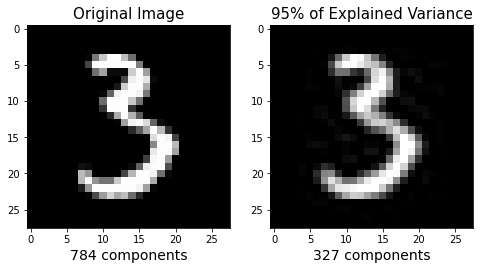

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x_t[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 15);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(scaler.inverse_transform(approximation[1]).reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('327 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 15);